#### kosis.kr : 1인당 전력사용량
- wide 형태 csv 읽어오기, long 형태로 stack/unstack 사용 변환, long 형태로 작업
- 경제성장률, 1인당 전력사용량 간의 상관 관계(피어슨)
- 년도별, 용도별(주택용, 일반용...) 판매전력량 (양, 비율)

In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

fn = '연도별_전력수급_실적_20230405210351_wide.csv'

pd_wide = pd.read_csv(fn, encoding='cp949')

pd_wide.head()

pd_data = pd_wide.set_index('실적구분별(1)')

pd_data = pd_data.stack()
pd_data = pd_data.unstack(level=0)

pd_data
# pd_data.transpose()

실적구분별(1),경제성장률 (%),판매전력량 (백만kWh),주택용판매전력량 (백만kWh),일반용판매전력량 (백만kWh),교육용판매전력량 (백만kWh),산업용판매전력량 (백만kWh),농사용판매전력량 (백만kWh),가로등판매전력량 (백만kWh),심야판매전력량 (백만kWh),인구1인당전력소비량 (kWh/년)
2010,6.5,434160.0,63199.0,97410.0,7452.0,232672.0,10654.0,3081.0,19690.0,8883.0
2011,3.7,455070.0,63523.0,99504.0,7568.0,251491.0,11232.0,3145.0,18607.0,9142.0
2012,2.3,466593.0,65484.0,101593.0,7860.0,258102.0,12776.0,3158.0,17620.0,9331.0
2013,2.9,474849.0,65815.0,102196.0,7947.0,265373.0,13866.0,3156.0,16496.0,9285.0
2014,3.3,477592.0,64457.0,100761.0,7438.0,272552.0,14505.0,3221.0,14658.0,9305.0
2015,2.6,483655.0,65619.0,103679.0,7691.0,273548.0,15702.0,3341.0,14075.0,9555.0
2016,2.8,497039.0,68057.0,108617.0,8079.0,278828.0,16580.0,3462.0,13416.0,9699.0
2017,3.1,507746.0,68544.0,111298.0,8316.0,285970.0,17251.0,3557.0,12811.0,9869.0
2018,2.7,526149.0,72895.0,116934.0,8678.0,292999.0,18504.0,3583.0,12558.0,10195.0
2019,2.0,520499.0,72639.0,116227.0,8561.0,289240.0,18882.0,3571.0,11379.0,10039.0


In [65]:
pd_wide = pd_wide.set_index('실적구분별(1)').stack().unstack(level=0)

pd_wide.columns.name=''

pd_wide

pd_wide = pd_wide.reset_index()

col_names = list(pd_wide.columns)
col_names[0] = '년도'
pd_wide.columns = col_names

pd_wide

,년도,경제성장률 (%),판매전력량 (백만kWh),주택용판매전력량 (백만kWh),일반용판매전력량 (백만kWh),교육용판매전력량 (백만kWh),산업용판매전력량 (백만kWh),농사용판매전력량 (백만kWh),가로등판매전력량 (백만kWh),심야판매전력량 (백만kWh),인구1인당전력소비량 (kWh/년)
0,2010,6.5,434160.0,63199.0,97410.0,7452.0,232672.0,10654.0,3081.0,19690.0,8883.0
1,2011,3.7,455070.0,63523.0,99504.0,7568.0,251491.0,11232.0,3145.0,18607.0,9142.0
2,2012,2.3,466593.0,65484.0,101593.0,7860.0,258102.0,12776.0,3158.0,17620.0,9331.0
3,2013,2.9,474849.0,65815.0,102196.0,7947.0,265373.0,13866.0,3156.0,16496.0,9285.0
4,2014,3.3,477592.0,64457.0,100761.0,7438.0,272552.0,14505.0,3221.0,14658.0,9305.0
5,2015,2.6,483655.0,65619.0,103679.0,7691.0,273548.0,15702.0,3341.0,14075.0,9555.0
6,2016,2.8,497039.0,68057.0,108617.0,8079.0,278828.0,16580.0,3462.0,13416.0,9699.0
7,2017,3.1,507746.0,68544.0,111298.0,8316.0,285970.0,17251.0,3557.0,12811.0,9869.0
8,2018,2.7,526149.0,72895.0,116934.0,8678.0,292999.0,18504.0,3583.0,12558.0,10195.0
9,2019,2.0,520499.0,72639.0,116227.0,8561.0,289240.0,18882.0,3571.0,11379.0,10039.0


In [66]:
import numpy as np
import matplotlib.pyplot as plt

In [67]:
pd_long = pd.read_csv('연도별_전력수급_실적_20230405210501_long.csv', encoding='cp949')

In [68]:
x = pd_long['경제성장률 (%)']
x = pd_long.iloc[:,1]
y = pd_long['인구1인당전력소비량 (kWh/년)']
y = pd_long.iloc[:,-1]

np.corrcoef(x, y)


array([[ 1.        , -0.41398776],
       [-0.41398776,  1.        ]])

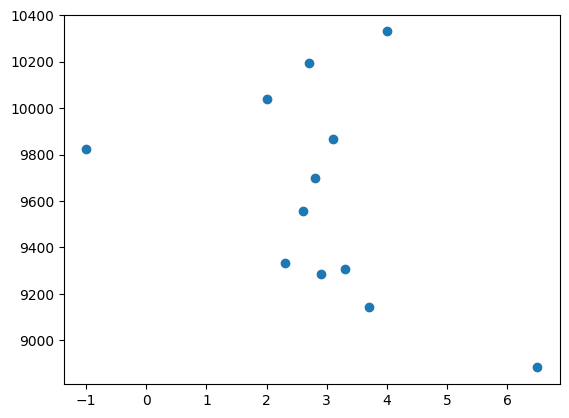

In [69]:
_, axe = plt.subplots()

axe.scatter(x,y)

In [70]:
df5 = pd_wide.set_index('년도')

df5

,경제성장률 (%),판매전력량 (백만kWh),주택용판매전력량 (백만kWh),일반용판매전력량 (백만kWh),교육용판매전력량 (백만kWh),산업용판매전력량 (백만kWh),농사용판매전력량 (백만kWh),가로등판매전력량 (백만kWh),심야판매전력량 (백만kWh),인구1인당전력소비량 (kWh/년)
년도,,,,,,,,,,
2010,6.5,434160.0,63199.0,97410.0,7452.0,232672.0,10654.0,3081.0,19690.0,8883.0
2011,3.7,455070.0,63523.0,99504.0,7568.0,251491.0,11232.0,3145.0,18607.0,9142.0
2012,2.3,466593.0,65484.0,101593.0,7860.0,258102.0,12776.0,3158.0,17620.0,9331.0
2013,2.9,474849.0,65815.0,102196.0,7947.0,265373.0,13866.0,3156.0,16496.0,9285.0
2014,3.3,477592.0,64457.0,100761.0,7438.0,272552.0,14505.0,3221.0,14658.0,9305.0
2015,2.6,483655.0,65619.0,103679.0,7691.0,273548.0,15702.0,3341.0,14075.0,9555.0
2016,2.8,497039.0,68057.0,108617.0,8079.0,278828.0,16580.0,3462.0,13416.0,9699.0
2017,3.1,507746.0,68544.0,111298.0,8316.0,285970.0,17251.0,3557.0,12811.0,9869.0
2018,2.7,526149.0,72895.0,116934.0,8678.0,292999.0,18504.0,3583.0,12558.0,10195.0


In [71]:
df6 = df5 .iloc[:, 1:-1]

df6.columns = ['전체판매량', '주택', '일반', '교육', '산업', '농사', '가로등', '심야']

df6.stack()

년도         
2010  전체판매량    434160.0
      주택        63199.0
      일반        97410.0
      교육         7452.0
      산업       232672.0
                 ...   
2021  교육         8423.0
      산업       291333.0
      농사        20603.0
      가로등        3444.0
      심야        10162.0
Length: 96, dtype: float64

In [79]:
# df6['주택']/df6['전체판매량']

# 데이터프레임 브로드캐스팅 실패
# df6.iloc[:, 1:]/df6['전체판매량']


elements = df6.iloc[:, 1:]
total = df6['전체판매량']

print(elements.T.shape)
print(total.shape)

elements_t = elements.T

ratio_result = elements_t/total

ratio_result

(7, 12)
(12,)


년도,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
주택,0.145566,0.139590,0.140345,0.138602,0.134962,0.135673,0.136925,0.134997,0.138544,0.139556,0.149828,0.149813
일반,0.224364,0.218656,0.217734,0.215218,0.210977,0.214366,0.218528,0.219200,0.222245,0.223299,0.223141,0.224115
교육,0.017164,0.016630,0.016846,0.016736,0.015574,0.015902,0.016254,0.016378,0.016493,0.016448,0.014756,0.015790
산업,0.535913,0.552642,0.553163,0.558858,0.570680,0.565585,0.560978,0.563215,0.556875,0.555698,0.547175,0.546149
농사,0.024539,0.024682,0.027381,0.029201,0.030371,0.032465,0.033358,0.033976,0.035169,0.036277,0.037365,0.038624
가로등,0.007096,0.006911,0.006768,0.006646,0.006744,0.006908,0.006965,0.007005,0.006810,0.006861,0.006886,0.006456
심야,0.045352,0.040888,0.037763,0.034739,0.030691,0.029101,0.026992,0.025231,0.023868,0.021862,0.020846,0.019050


In [82]:
ratio_result.T*100

,주택,일반,교육,산업,농사,가로등,심야
년도,,,,,,,
2010,14.556615,22.436429,1.716418,53.591303,2.453934,0.709646,4.535194
2011,13.958951,21.865647,1.663041,55.264245,2.468192,0.691102,4.088821
2012,14.034501,21.773366,1.684552,55.316304,2.738147,0.676821,3.776310
2013,13.860196,21.521789,1.673585,55.885766,2.920086,0.664632,3.473946
2014,13.496248,21.097715,1.557396,57.067958,3.037111,0.674425,3.069147
2015,13.567316,21.436561,1.590183,56.558497,3.246529,0.690782,2.910132
2016,13.692487,21.852812,1.625426,56.097811,3.335754,0.696525,2.699185
2017,13.499663,21.920015,1.637827,56.321468,3.397565,0.700547,2.523112
2018,13.854440,22.224503,1.649343,55.687457,3.516874,0.680986,2.386776


In [87]:
(df6.iloc[:, 1:].T/df6.iloc[:,0]).T*100

,주택,일반,교육,산업,농사,가로등,심야
년도,,,,,,,
2010,14.556615,22.436429,1.716418,53.591303,2.453934,0.709646,4.535194
2011,13.958951,21.865647,1.663041,55.264245,2.468192,0.691102,4.088821
2012,14.034501,21.773366,1.684552,55.316304,2.738147,0.676821,3.776310
2013,13.860196,21.521789,1.673585,55.885766,2.920086,0.664632,3.473946
2014,13.496248,21.097715,1.557396,57.067958,3.037111,0.674425,3.069147
2015,13.567316,21.436561,1.590183,56.558497,3.246529,0.690782,2.910132
2016,13.692487,21.852812,1.625426,56.097811,3.335754,0.696525,2.699185
2017,13.499663,21.920015,1.637827,56.321468,3.397565,0.700547,2.523112
2018,13.854440,22.224503,1.649343,55.687457,3.516874,0.680986,2.386776
